In [1]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [2]:
data<-iris[,-5]

In [3]:
E.dist <- dist(data, method="euclidean") 

Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <e6>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <ad>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <90>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <e5>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <bc>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“conversion failure on '歐式距離' in 'mbcsToSbcs': dot substituted for <8f>”Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“

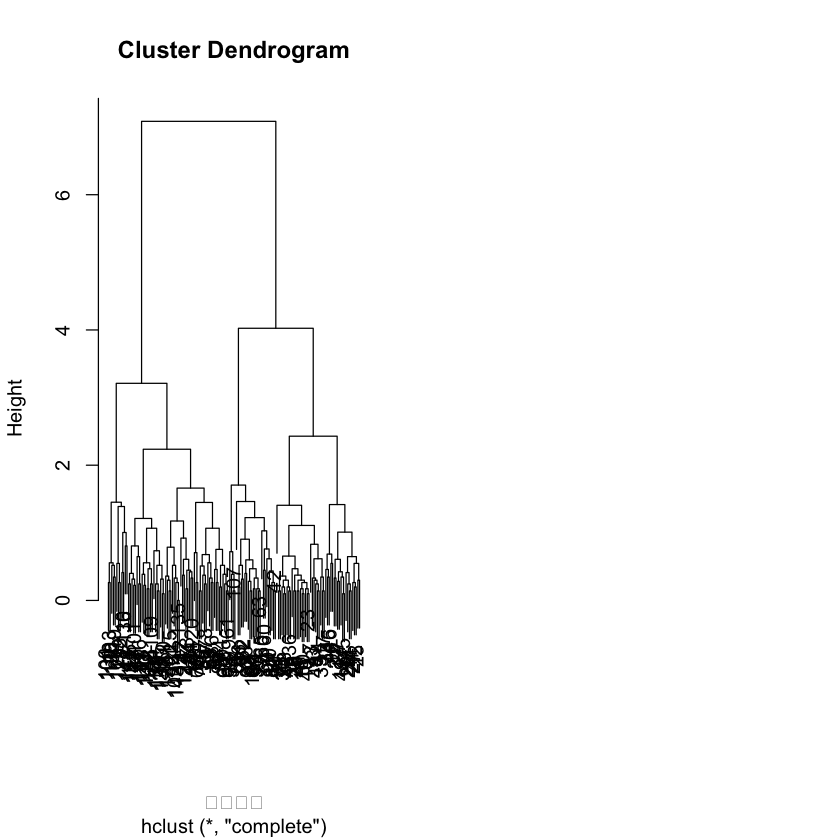

In [6]:
par(mfrow=c(1,2)) # 讓圖片以1x2的方式呈現，詳情請見(4)繪圖-資料視覺化

# 使用歐式距離進行分群
h.E.cluster <- hclust(E.dist)
plot(h.E.cluster, xlab="歐式距離")


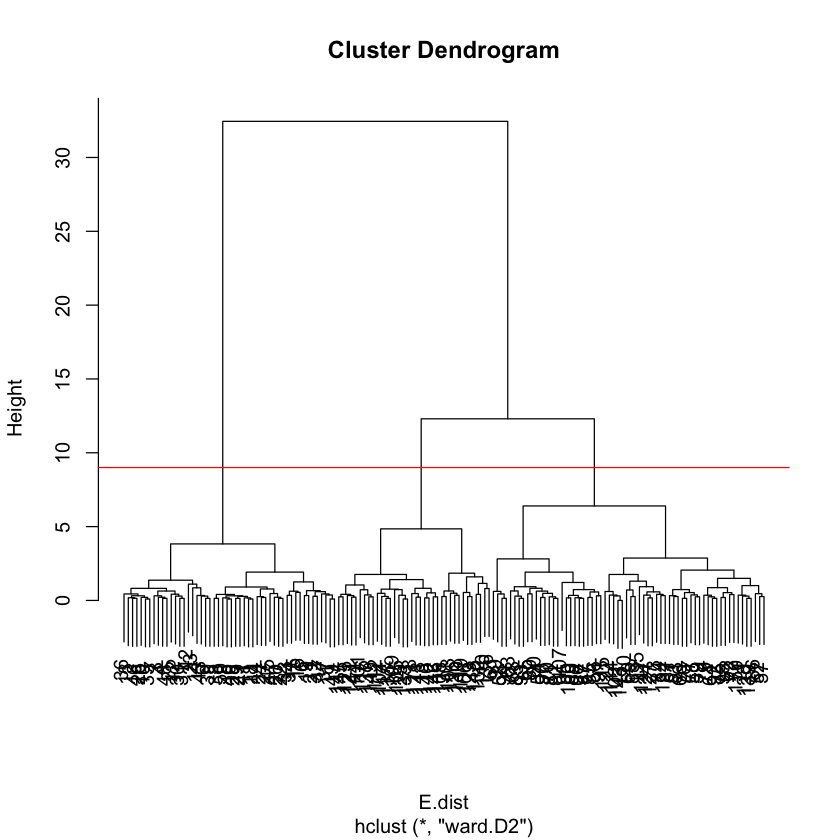

In [7]:
E.dist <- dist(data, method="euclidean")      # 歐式距離
h.cluster <- hclust(E.dist, method="ward.D2") # 華德法

# 視覺化
plot(h.cluster)
abline(h=9, col="red")

In [8]:
cut.h.cluster <- cutree(h.cluster, k=3)  # 分成三群
cut.h.cluster                            # 分群結果

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

In [9]:
table(cut.h.cluster, iris$Species)       # 分群結果和實際結果比較

             
cut.h.cluster setosa versicolor virginica
            1     50          0         0
            2      0         49        15
            3      0          1        35

In [10]:
# k Means
kmeans.cluster <- kmeans(data, centers=3) 

# 群內的變異數
kmeans.cluster$withinss

[1] 39.82097 23.87947 15.15100

In [11]:
# 分群結果和實際結果比較
table(kmeans.cluster$cluster, iris$Species)  

   
    setosa versicolor virginica
  1      0         48        14
  2      0          2        36
  3     50          0         0

Loading required package: factoextra
Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
“argument frame is deprecated; please use ellipse instead.”Warning message:
“argument frame.type is deprecated; please use ellipse.type instead.”

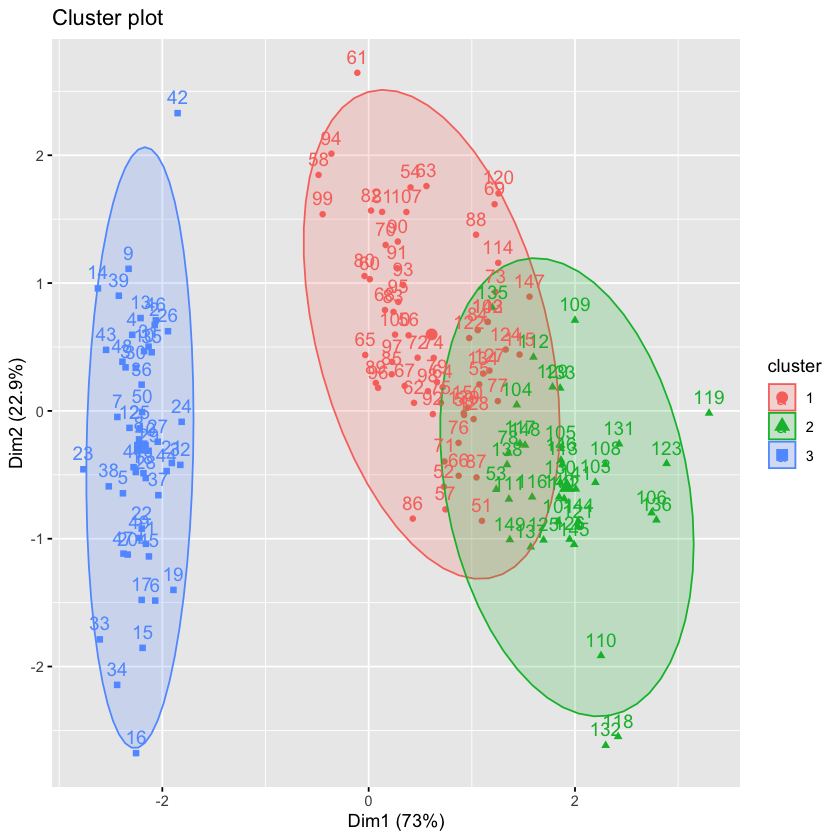

In [12]:
# 視覺化 k-means 分群結果(基於ggplot2的語法)
require(factoextra)
fviz_cluster(kmeans.cluster,           # 分群結果
             data = data,              # 資料
             geom = c("point","text"), # 點和標籤(point & label)
             frame.type = "norm")      # 框架型態